## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95


In [7]:
results = {}

for bs in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=bs, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-bs-%s" % (str(bs))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0723 22:16:57.650966 18168 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 22:16:57.664942 18168 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 22:16:57.794903 18168 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 22:16:57.813896 18168 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 352s 7ms/step - loss: 2.1987 - acc: 0.1898 - val_loss: 4.5900 - val_acc: 0.1946
Epoch 50/50
50000/50000 [==============================] - 352s 7ms/step - loss: 2.2047 - acc: 0.1886 - val_loss: 4.6193 - val_acc: 0.1841
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 46s 926us/step - loss: 0.5759 - acc: 0.7945 - val_loss: 1.5537 - val_acc: 0.5512
Epoch 48/50
50000/50000 [==============================] - 46s 924us/step - loss: 0.5671 - acc: 0.7991 - val_loss: 1.5793 - val_acc: 0.5509
Epoch 49/50
50000/50000 [==============================] - 46s 928us/step - loss: 0.5629 - acc: 0.8004 - val_loss: 1.5782 - val_acc: 0.5491
Epoch 50/50
50000/50000 [==============================] - 46s 924us/step - loss: 0.5591 - acc: 0.8005 - val_loss: 1.5762 - val_acc: 0.5488
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1

50000/50000 [==============================] - 26s 521us/step - loss: 0.2940 - acc: 0.8951 - val_loss: 2.0079 - val_acc: 0.5416
Epoch 46/50
50000/50000 [==============================] - 26s 512us/step - loss: 0.2858 - acc: 0.8986 - val_loss: 2.0080 - val_acc: 0.5455
Epoch 47/50
50000/50000 [==============================] - 26s 511us/step - loss: 0.2830 - acc: 0.8991 - val_loss: 2.0454 - val_acc: 0.5378
Epoch 48/50
50000/50000 [==============================] - 26s 516us/step - loss: 0.2813 - acc: 0.8991 - val_loss: 2.0383 - val_acc: 0.5427
Epoch 49/50
50000/50000 [==============================] - 25s 510us/step - loss: 0.2705 - acc: 0.9043 - val_loss: 2.0606 - val_acc: 0.5392
Epoch 50/50
50000/50000 [==============================] - 26s 512us/step - loss: 0.2613 - acc: 0.9074 - val_loss: 2.0958 - val_acc: 0.5372
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072

50000/50000 [==============================] - 11s 223us/step - loss: 0.0820 - acc: 0.9753 - val_loss: 2.5781 - val_acc: 0.5198
Epoch 44/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.0815 - acc: 0.9759 - val_loss: 2.5249 - val_acc: 0.5193
Epoch 45/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.0655 - acc: 0.9819 - val_loss: 2.5551 - val_acc: 0.5331
Epoch 46/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.0701 - acc: 0.9793 - val_loss: 2.5916 - val_acc: 0.5270
Epoch 47/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.0634 - acc: 0.9820 - val_loss: 2.6195 - val_acc: 0.5218
Epoch 48/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.0664 - acc: 0.9801 - val_loss: 2.6435 - val_acc: 0.5211
Epoch 49/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.0614 - acc: 0.9826 - val_loss: 2.6479 - val_acc: 0.5230
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 8s 161us/step - loss: 0.0665 - acc: 0.9891 - val_loss: 2.3608 - val_acc: 0.5092
Epoch 42/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.0594 - acc: 0.9911 - val_loss: 2.3790 - val_acc: 0.5103
Epoch 43/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.0575 - acc: 0.9906 - val_loss: 2.4160 - val_acc: 0.5058
Epoch 44/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.0520 - acc: 0.9923 - val_loss: 2.4484 - val_acc: 0.5129
Epoch 45/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.0536 - acc: 0.9907 - val_loss: 2.4447 - val_acc: 0.5094
Epoch 46/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.0492 - acc: 0.9925 - val_loss: 2.4887 - val_acc: 0.5115
Epoch 47/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.0413 - acc: 0.9943 - val_loss: 2.5166 - val_acc: 0.5102
Epoch 48/50
50000/50000 [==============

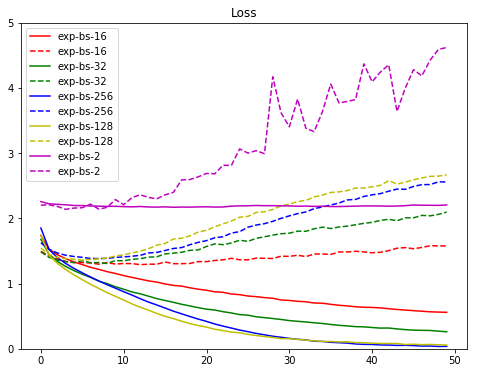

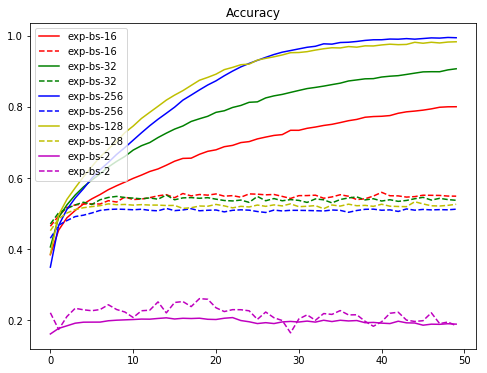

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()